In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows',1000)

In [2]:
#Read in merged paint data file
df = pd.read_csv('Paint_Data_Merged.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head(30)

metric  value                 time  is_prod  count
0   E_C100  390.0  2022-04-15 00:00:00      0.0    0.0
1   E_C100  120.0  2022-04-15 01:00:00      0.0    0.0
2   E_C100  120.0  2022-04-15 02:00:00      0.0    0.0
3   E_C100  120.0  2022-04-15 03:00:00      0.0    0.0
4   E_C100  110.0  2022-04-15 04:00:00      0.0    0.0
5   E_C100  110.0  2022-04-15 05:00:00      0.0    0.0
6   E_C100  100.0  2022-04-15 06:00:00      0.0    0.0
7   E_C100  110.0  2022-04-15 07:00:00      0.0    0.0
8   E_C100  110.0  2022-04-15 08:00:00      0.0    0.0
9   E_C100  110.0  2022-04-15 09:00:00      0.0    0.0
10  E_C100  110.0  2022-04-15 10:00:00      0.0    0.0
11  E_C100  110.0  2022-04-15 11:00:00      0.0    0.0
12  E_C100  120.0  2022-04-15 12:00:00      0.0    0.0
13  E_C100  120.0  2022-04-15 13:00:00      0.0    0.0
14  E_C100  110.0  2022-04-15 14:00:00      0.0    0.0
15  E_C100  120.0  2022-04-15 15:00:00      0.0    0.0
16  E_C100  120.0  2022-04-15 16:00:00      0.0    0.0
17  E_C100  110.0  2022-04-15 17:00:00      0.0    0.0
18  E_C100  110.0  2022-04-15 18:00:00      0.0    0.0
19  E_C100  120.0  2022-04-15 19:00:00      0.0    0.0
20  E_C100  130.0  2022-04-15 20:00:00      0.0    0.0
21  E_C100  120.0  2022-04-15 21:00:00      0.0    0.0
22  E_C100  110.0  2022-04-15 22:00:00      0.0    0.0
23  E_C100  120.0  2022-04-15 23:00:00      0.0    0.0
24  E_C100  120.0  2022-04-16 00:00:00      0.0    0.0
25  E_C100  120.0  2022-04-16 01:00:00      0.0    0.0
26  E_C100  110.0  2022-04-16 02:00:00      0.0    0.0
27  E_C100  120.0  2022-04-16 03:00:00      0.0    0.0
28  E_C100  120.0  2022-04-16 04:00:00      0.0    0.0
29  E_C100  120.0  2022-04-16 05:00:00      0.0    0.0

In [3]:
df.index = pd.to_datetime(df['time'], format='%Y.%m.%d %H:%M:%S')

In [4]:
df['metric'].unique()

array(['E_C100', 'E_C1000', 'E_C1100', 'E_C1200', 'E_C200', 'E_C300',
       'E_C400', 'E_C500', 'E_C600', 'E_C700', 'E_C800'], dtype=object)

In [5]:
meters = ['E_C100', 'E_C200', 'E_C300', 'E_C400', 'E_C500', 'E_C600', 'E_C700', 'E_C800']

In [6]:
def df_to_X_y_multivar(df, X_start = [], y_start = [], window_size = 10):
    df_as_np= df.to_numpy()
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return X, y 

In [7]:
df

metric  value                 time  is_prod  count
time                                                                   
2022-04-15 00:00:00  E_C100  390.0  2022-04-15 00:00:00      0.0    0.0
2022-04-15 01:00:00  E_C100  120.0  2022-04-15 01:00:00      0.0    0.0
2022-04-15 02:00:00  E_C100  120.0  2022-04-15 02:00:00      0.0    0.0
2022-04-15 03:00:00  E_C100  120.0  2022-04-15 03:00:00      0.0    0.0
2022-04-15 04:00:00  E_C100  110.0  2022-04-15 04:00:00      0.0    0.0
...                     ...    ...                  ...      ...    ...
2022-06-29 06:00:00  E_C800  300.0  2022-06-29 06:00:00      0.0   63.0
2022-06-29 07:00:00  E_C800  310.0  2022-06-29 07:00:00      1.0   71.0
2022-06-29 08:00:00  E_C800  300.0  2022-06-29 08:00:00      1.0   56.0
2022-06-29 09:00:00  E_C800  300.0  2022-06-29 09:00:00      1.0   75.0
2022-06-29 10:00:00  E_C800  300.0  2022-06-29 10:00:00      1.0   27.0

[19921 rows x 5 columns]

In [8]:
#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(df['value'])

In [9]:
usage_df = df

usage_df['Seconds'] = df.index.map(pd.Timestamp.timestamp)

day = 60*60*24
year=day *365.2425

usage_df['Day sin'] = np.sin(usage_df['Seconds'] * (2*np.pi/day))
usage_df['Day cos'] = np.cos(usage_df['Seconds'] * (2*np.pi/day))
usage_df['Year sin'] = np.sin(usage_df['Seconds'] * (2*np.pi/year))
usage_df['Year cos'] = np.cos(usage_df['Seconds'] * (2*np.pi/year))

usage_df = usage_df.drop(['Seconds'], axis =1)
usage_df = usage_df.loc[usage_df['metric'].isin(meters)]

usage_df = pd.get_dummies(usage_df, columns=['metric'])
usage_df = usage_df.drop(['time'], axis = 1)

In [10]:
usage_df

value  is_prod  count       Day sin       Day cos  \
time                                                                     
2022-04-15 00:00:00  390.0      0.0    0.0 -1.271365e-11  1.000000e+00   
2022-04-15 01:00:00  120.0      0.0    0.0  2.588190e-01  9.659258e-01   
2022-04-15 02:00:00  120.0      0.0    0.0  5.000000e-01  8.660254e-01   
2022-04-15 03:00:00  120.0      0.0    0.0  7.071068e-01  7.071068e-01   
2022-04-15 04:00:00  110.0      0.0    0.0  8.660254e-01  5.000000e-01   
...                    ...      ...    ...           ...           ...   
2022-06-29 06:00:00  300.0      0.0   63.0  1.000000e+00  1.302874e-11   
2022-06-29 07:00:00  310.0      1.0   71.0  9.659258e-01 -2.588190e-01   
2022-06-29 08:00:00  300.0      1.0   56.0  8.660254e-01 -5.000000e-01   
2022-06-29 09:00:00  300.0      1.0   75.0  7.071068e-01 -7.071068e-01   
2022-06-29 10:00:00  300.0      1.0   27.0  5.000000e-01 -8.660254e-01   

                     Year sin  Year cos  metric_E_C100  metric_E_C200  \
time                                                                    
2022-04-15 00:00:00  0.974794 -0.223108              1              0   
2022-04-15 01:00:00  0.974634 -0.223807              1              0   
2022-04-15 02:00:00  0.974473 -0.224505              1              0   
2022-04-15 03:00:00  0.974312 -0.225204              1              0   
2022-04-15 04:00:00  0.974150 -0.225902              1              0   
...                       ...       ...            ...            ...   
2022-06-29 06:00:00  0.051263 -0.998685              0              0   
2022-06-29 07:00:00  0.050547 -0.998722              0              0   
2022-06-29 08:00:00  0.049832 -0.998758              0              0   
2022-06-29 09:00:00  0.049116 -0.998793              0              0   
2022-06-29 10:00:00  0.048400 -0.998828              0              0   

                     metric_E_C300  metric_E_C400  metric_E_C500  \
time                                                               
2022-04-15 00:00:00              0              0              0   
2022-04-15 01:00:00              0              0              0   
2022-04-15 02:00:00              0              0              0   
2022-04-15 03:00:00              0              0              0   
2022-04-15 04:00:00              0              0              0   
...                            ...            ...            ...   
2022-06-29 06:00:00              0              0              0   
2022-06-29 07:00:00              0              0              0   
2022-06-29 08:00:00              0              0              0   
2022-06-29 09:00:00              0              0              0   
2022-06-29 10:00:00              0              0              0   

                     metric_E_C600  metric_E_C700  metric_E_C800  
time                                                              
2022-04-15 00:00:00              0              0              0  
2022-04-15 01:00:00              0              0              0  
2022-04-15 02:00:00              0              0              0  
2022-04-15 03:00:00              0              0              0  
2022-04-15 04:00:00              0              0              0  
...                            ...            ...            ...  
2022-06-29 06:00:00              0              0              1  
2022-06-29 07:00:00              0              0              1  
2022-06-29 08:00:00              0              0              1  
2022-06-29 09:00:00              0              0              1  
2022-06-29 10:00:00              0              0              1  

[14488 rows x 15 columns]

In [11]:
metric_cols = ['metric_E_C100','metric_E_C200','metric_E_C300','metric_E_C400','metric_E_C500','metric_E_C600','metric_E_C700','metric_E_C800']
WINDOW_SIZE= 24
X = []
y = []

for meter in metric_cols:
    df_subset = usage_df.loc[usage_df[meter]==1].copy()
    
    X, y= df_to_X_y_multivar(df_subset, X, y, WINDOW_SIZE) 

    print(len(X))
X = np.array(X)
y = np.array(y)

    

1787
3574
5361
7148
8935
10722
12509
14296


In [12]:
#Split arrays into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

usage_training_mean = np.mean(X_train[:,:,0])
usage_training_std = np.std(X_train[:,:,0])

print('mean: ',usage_training_mean )
print('std: ',usage_training_std )

def preprocess(X_temp):
    X_temp[:,:,0] = (X_temp[:,:,0] - usage_training_mean) / usage_training_std
    return X_temp

def preprocess_output(y_temp):
    y_temp = (y_temp - usage_training_mean) / usage_training_std
    return y_temp

def postprocess_output(y_temp):
    y_temp = (y_temp* usage_training_std ) + usage_training_mean
    return y_temp


pp_X_train = preprocess(X_train)
pp_y_train = preprocess_output(y_train)

pp_X_test = preprocess(X_test)
pp_y_test = preprocess_output(y_test)

mean:  361.1588040690218
std:  299.8906283956299


In [13]:
usage_training_mean

361.1588040690218

In [14]:
 
test = np.array([1060, 1040, 1040])    


test = preprocess_output(test)


(test* usage_training_std ) + usage_training_mean

array([1060., 1040., 1040.])

<h1>Model</h1>

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

#model2 = Sequential()
#model2.add(InputLayer((WINDOW_SIZE, 15)))
#model2.add(GRU(64))
#model2.add(Dense(8,'relu'))
#model2.add(Dense(1,'linear'))

#model2.summary()



model = Sequential()
model.add(GRU(64, return_sequences=True, activation='swish', input_shape=(WINDOW_SIZE, 15)))
model.add(GRU(128, return_sequences=True, activation='swish'))
model.add(GRU(64, return_sequences=False, activation='swish'))
#Add dense layer
model.add(Dense(64, activation='swish'))
model.add(Dense(32, activation='swish'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 64)            15552     
                                                                 
 gru_1 (GRU)                 (None, 24, 128)           74496     
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 133,569
Trainable params: 133,569
Non-trai

In [16]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [17]:
model.fit(pp_X_train, pp_y_train, validation_data=(pp_X_test, pp_y_test), epochs=(50))

Epoch 1/50
358/358 [==============================] - 13s 28ms/step - loss: 0.1990 - root_mean_squared_error: 0.4461 - val_loss: 0.1115 - val_root_mean_squared_error: 0.3340
Epoch 2/50
358/358 [==============================] - 9s 26ms/step - loss: 0.0901 - root_mean_squared_error: 0.3001 - val_loss: 0.1107 - val_root_mean_squared_error: 0.3327
Epoch 3/50
358/358 [==============================] - 11s 32ms/step - loss: 0.0794 - root_mean_squared_error: 0.2817 - val_loss: 0.0966 - val_root_mean_squared_error: 0.3108
Epoch 4/50
358/358 [==============================] - 12s 33ms/step - loss: 0.0760 - root_mean_squared_error: 0.2758 - val_loss: 0.0945 - val_root_mean_squared_error: 0.3075
Epoch 5/50
358/358 [==============================] - 12s 33ms/step - loss: 0.0699 - root_mean_squared_error: 0.2644 - val_loss: 0.0782 - val_root_mean_squared_error: 0.2796
Epoch 6/50
358/358 [==============================] - 12s 33ms/step - loss: 0.0696 - root_mean_squared_error: 0.2639 - val_loss: 0.

Epoch 48/50
358/358 [==============================] - 13s 38ms/step - loss: 0.0096 - root_mean_squared_error: 0.0981 - val_loss: 0.0724 - val_root_mean_squared_error: 0.2691
Epoch 49/50
358/358 [==============================] - 13s 36ms/step - loss: 0.0093 - root_mean_squared_error: 0.0966 - val_loss: 0.0763 - val_root_mean_squared_error: 0.2762
Epoch 50/50
358/358 [==============================] - 12s 34ms/step - loss: 0.0093 - root_mean_squared_error: 0.0964 - val_loss: 0.0783 - val_root_mean_squared_error: 0.2797


In [18]:
pp_X_test.shape

(2860, 24, 15)

In [19]:
test_predictions = model.predict(pp_X_test).flatten()
test_results=pd.DataFrame(data={'Test Predictions':postprocess_output(test_predictions), 'Actuals': y_test})
test_results.head(100)

90/90 [==============================] - 1s 9ms/step


Test Predictions  Actuals
0         752.449341    670.0
1         127.616760    310.0
2         157.753571    160.0
3         777.351440    770.0
4         685.295349    680.0
5         136.244461     50.0
6         446.508789    450.0
7         729.647461    710.0
8        1012.171082    900.0
9         171.361725     40.0
10          2.578979     20.0
11         14.065735     30.0
12        581.062073    590.0
13        463.260284    470.0
14        681.596680    690.0
15        651.373718    600.0
16        272.157959    210.0
17        282.349304    270.0
18        559.806274    600.0
19       1072.053711   1080.0
20        317.036987    300.0
21        271.534576    250.0
22        454.052216    430.0
23        657.518005    630.0
24        484.821106    450.0
25        972.364197    950.0
26        289.301758    160.0
27        269.852722    280.0
28         16.381409     10.0
29        837.648682    790.0
30        267.172913    270.0
31         43.304596    740.0
32         14.895050     10.0
33          1.848236     10.0
34        641.858154    650.0
35        464.295715    240.0
36        239.646545    220.0
37          7.963409     90.0
38        779.465759    760.0
39        128.091385    130.0
40        109.512619    120.0
41         12.243286     30.0
42         -1.084869     10.0
43        631.686523    680.0
44        559.855957    480.0
45        752.505615    740.0
46        456.719177    440.0
47        327.306213    310.0
48        714.284668    470.0
49        310.268066    310.0
50          8.773682     10.0
51        345.668945    340.0
52        317.644897    310.0
53        329.371368    320.0
54       1093.981812   1070.0
55        198.961014    260.0
56        285.594727    280.0
57        672.556763    680.0
58        281.252869    270.0
59         68.334137     60.0
60         12.374359     20.0
61          8.478149    300.0
62        590.307922    650.0
63        558.669312    540.0
64        169.435883     40.0
65        782.377441    770.0
66        542.607788    640.0
67         85.770172    160.0
68        153.633026    130.0
69        317.100494    310.0
70        682.679443    720.0
71        128.193359    120.0
72        673.976685    660.0
73          9.109009     10.0
74        335.709747    310.0
75        207.501709    210.0
76        684.101868    670.0
77       -169.601013      0.0
78        116.984665    160.0
79        104.617096    130.0
80        205.590759    290.0
81         12.994232     10.0
82        388.510162      0.0
83        166.215149     70.0
84        641.847656    640.0
85        216.886581    210.0
86        311.504852    320.0
87        124.072968      0.0
88        313.386780    310.0
89        284.642090    470.0
90        374.183807    250.0
91        109.722153    360.0
92        658.670898    640.0
93         59.866119     30.0
94        120.353043    120.0
95        788.577759    780.0
96        559.827820    480.0
97         69.365540     60.0
98        152.609772    130.0
99        239.424744    210.0

In [20]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, postprocess_output(test_predictions), squared=False)

83.89275395809197

In [21]:
test_predictions

array([ 1.3047774 , -0.77875745, -0.67826474, ..., -0.50784665,
       -0.3294782 , -1.1549737 ], dtype=float32)

In [22]:
train_predictions = model.predict(preprocess(X)).flatten()
train_results=pd.DataFrame(data={'Train Predictions':postprocess_output(train_predictions), 'Actuals': y})
train_results.head(100)

447/447 [==============================] - 4s 9ms/step


Train Predictions  Actuals
0          110.615234    120.0
1          104.662720    120.0
2          101.431244    110.0
3           83.494171    120.0
4           91.936310    120.0
5           87.148621    120.0
6           91.681549    130.0
7          104.566437    150.0
8          124.369659    160.0
9          134.813782    160.0
10         126.206680    160.0
11         142.116196    150.0
12         141.414246    150.0
13         154.287811    150.0
14         154.731842    130.0
15         131.156433    130.0
16         134.659470    120.0
17         131.189484    120.0
18         136.006577    130.0
19         149.735443    130.0
20         150.281723    130.0
21         144.303314    130.0
22         141.291000    130.0
23         136.617569    130.0
24         129.444641    120.0
25         111.424438    130.0
26         113.710464    130.0
27         106.177200    130.0
28         100.117279    130.0
29         100.386078    120.0
30          94.369354    130.0
31         115.089005    120.0
32          96.016632    120.0
33         118.146317    130.0
34         126.889389    130.0
35         114.167160    130.0
36         117.620377    120.0
37         114.204559    120.0
38         124.129684    120.0
39         128.061340    120.0
40         130.070145    120.0
41         130.062042    120.0
42         131.988205    120.0
43         134.399185    130.0
44         145.850632    130.0
45         146.650101    130.0
46         142.553650    130.0
47         135.660629    130.0
48         126.399338    130.0
49         119.431961    130.0
50         112.985382    130.0
51         104.734863    130.0
52          98.690033    130.0
53          99.320374    130.0
54         103.892212    120.0
55          96.589661    130.0
56         120.105988    140.0
57         123.938370    130.0
58         108.910843    130.0
59         121.494827    340.0
60         470.835144    480.0
61         469.726257    480.0
62         490.280701    470.0
63         525.942749    480.0
64         538.455078    470.0
65         523.983521    580.0
66         570.987488    550.0
67         569.849548    560.0
68         531.226440    550.0
69         535.082642    570.0
70         537.196960    540.0
71         495.655396    420.0
72         283.874908    310.0
73         343.957092    330.0
74         403.805389    420.0
75         589.650085    610.0
76         574.673523    570.0
77         739.640991    720.0
78         809.712891    840.0
79         944.683105    950.0
80        1041.675537    980.0
81        1045.020386   1050.0
82        1079.375610   1090.0
83        1082.371826   1070.0
84        1063.506592   1030.0
85        1070.406982   1090.0
86        1051.564575   1070.0
87         926.314331    950.0
88        1005.219055    990.0
89        1080.729004   1100.0
90        1104.914307   1080.0
91        1090.596436   1090.0
92        1088.062378   1060.0
93        1091.279053   1100.0
94        1068.021729   1090.0
95        1080.453857   1090.0
96        1029.045288   1000.0
97         780.013550    780.0
98         450.427734    390.0
99         272.157959    210.0

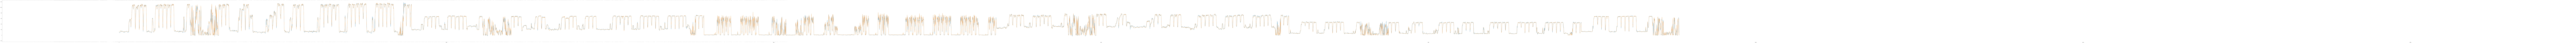

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(900,15))
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

<h1>Validation Set and Bootstrapping</h1>

In [24]:
WINDOW_SIZE = 24


df_val = pd.read_csv('Val_Paint_Data_Merged.csv')
df_val = df_val.drop(['Unnamed: 0'], axis=1)
df_val.index = pd.to_datetime(df_val['time'], format='%Y.%m.%d %H:%M:%S')
df_val.head(30)

usage_df_val = df_val

usage_df_val['Seconds'] = df_val.index.map(pd.Timestamp.timestamp)

day = 60*60*24
year=day *365.2425

usage_df_val['Day sin'] = np.sin(usage_df_val['Seconds'] * (2*np.pi/day))
usage_df_val['Day cos'] = np.cos(usage_df_val['Seconds'] * (2*np.pi/day))
usage_df_val['Year sin'] = np.sin(usage_df_val['Seconds'] * (2*np.pi/year))
usage_df_val['Year cos'] = np.cos(usage_df_val['Seconds'] * (2*np.pi/year))

usage_df_val = usage_df_val.drop(['Seconds'], axis =1)
usage_df_val = usage_df_val.loc[usage_df_val['metric'].isin(meters)]

#make dummy variables for the values in column 'metric'
usage_df_val = pd.get_dummies(usage_df_val, columns=['metric'])
#Drop 'time' column
usage_df_val = usage_df_val.drop(['time'], axis = 1)

preds = []
acts = []

start_point = 100

for i in range(24*7):
    bootstrap_x = np.expand_dims(usage_df_val.to_numpy()[i + start_point :i + start_point + WINDOW_SIZE], 0)
    #print(bootstrap_x)
    pred_y = postprocess_output(model.predict(preprocess(bootstrap_x)))[0][0]
    act_y = usage_df_val.to_numpy()[start_point + i+WINDOW_SIZE][0]
    usage_df_val.iloc[start_point + i+WINDOW_SIZE, 0] = pred_y
    
    preds.append(pred_y)
    acts.append(act_y)
    
    
    #print(pred_y)
    #print(act_y)
    #print('--------')

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 20ms/step


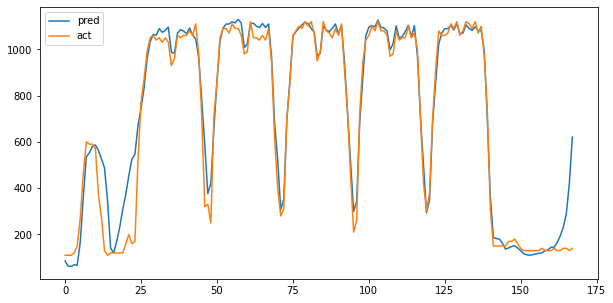

In [25]:
import matplotlib.pyplot as plt

val_results=pd.DataFrame(data={'Train Predictions':preds, 'Actuals': acts})


plt.figure(figsize=(10,5))
plt.plot(val_results['Train Predictions'], label='pred')
plt.plot(val_results['Actuals'], label='act')
plt.legend(loc="upper left")


In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(acts, preds, squared=False)

90.71524986920659

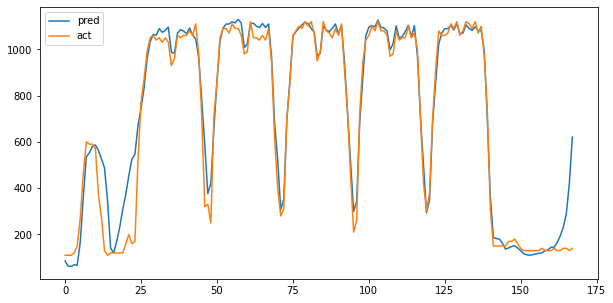

In [27]:
import matplotlib.pyplot as plt

val_results=pd.DataFrame(data={'Train Predictions':preds, 'Actuals': acts})


plt.figure(figsize=(10,5))
plt.plot(val_results['Train Predictions'], label='pred')
plt.plot(val_results['Actuals'], label='act')
plt.legend(loc="upper left")
